Installing and using Pandas

In [2]:
import pandas as pd

pd.__version__

'2.3.3'

## Introducing Pandas Objects

In [3]:
import numpy as np
import pandas as pd

`The Pandas Series Object`

A pandas Series is a one-dimensional arrays of indexed data. It can be ceartesd. it can be created from a list or array as follows

In [4]:

data =pd.Series([0.25,0.4,0.75,1.0])
data

0    0.25
1    0.40
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.4 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
# Like with a NumPy array, data can be accessed by the associated index via the familier python square-baracker notation:

data[1]

np.float64(0.4)

In [8]:
data[1:3]

1    0.40
2    0.75
dtype: float64

`Series as generalized NumPy array`

In [9]:
data =pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

np.float64(0.5)

In [11]:
# We can use noncontiguous or nonsequential indices:

data =pd.Series([0.25, 0.5, 0.75, 1.0], index=[2,5,3,7])

`Series as Specialized Dictionary`

In [12]:
population_dict ={
    'California': 38333434,
    'Texas':34434343,
    'New York': 54764365,
    'Florida': 43756324,
    'Illinois':54656543
}

population =pd.Series(population_dict)
population

California    38333434
Texas         34434343
New York      54764365
Florida       43756324
Illinois      54656543
dtype: int64

In [13]:
population['California']

np.int64(38333434)

`Constructing Series Objects`

In [14]:
pd.Series(data)

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [15]:
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [16]:
# data can be scalar, which is repeated to fiill the specified index:

pd.Series(5, index=[100,200,300])

100    5
200    5
300    5
dtype: int64

In [17]:
# the index can be explicitly set if a different result is preferred:

pd.Series({2:'a', 1:'b', 3:'c'}, index=[3,2])

3    c
2    a
dtype: object

## THe Pandas DataFrame Object

DataFrame as a generalized NumPy array

In [18]:
area_dict ={'California': 434343, 'Texas':434343, 'New York': 34343, 'Florida': 434343, 'Illinois': 434343}

area =pd.Series(area_dict)
area

California    434343
Texas         434343
New York       34343
Florida       434343
Illinois      434343
dtype: int64

In [19]:
states =pd.DataFrame({'population': population, 'area':area})
states

,population,area
California,38333434,434343
Texas,34434343,434343
New York,54764365,34343
Florida,43756324,434343
Illinois,54656543,434343


In [20]:
# Like the Series object, the Dataframe has an index attribute that gives access to the index label:

states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [21]:
# Additionaly, the DataFrame has a columns attribute, which is an Index object holding the column labels:

states.columns

Index(['population', 'area'], dtype='object')

In [22]:
# DataFrame as specialized dictionary

states['area'],states['population']

(California    434343
 Texas         434343
 New York       34343
 Florida       434343
 Illinois      434343
 Name: area, dtype: int64,
 California    38333434
 Texas         34434343
 New York      54764365
 Florida       43756324
 Illinois      54656543
 Name: population, dtype: int64)

`Constructing DataFrame objects`

In [23]:
# From a single Series object - a DataFrame is a collection of series 

pd.DataFrame(population, columns=['populations'])



,populations
California,38333434
Texas,34434343
New York,54764365
Florida,43756324
Illinois,54656543


In [24]:
# From alist of dict -> Any list of dictionaries can be made into a DataFrame. well use a simple list comprehension to create some data:

data =[{'a':i, 'b': 2 *i} for i in range(3)]

pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [25]:
# Even if some keys in the dictionary are missing, Pandas will fill them in with Nan(i.e, "not a number")values:

pd.DataFrame([{'a':1,'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


From a dictionary of Series objects. As we swa before , a DataFrame can be constructed from a dictionary of series objects as well:

In [26]:
pd.DataFrame({'population': population, 'area':area})

,population,area
California,38333434,434343
Texas,34434343,434343
New York,54764365,34343
Florida,43756324,434343
Illinois,54656543,434343


From a two-dimentional Numpy array. Give a two-dimentional array of data , we ca create a DataFrame with any specifies columns and index names.if omitted, an integer index will be used for each

In [27]:
pd.DataFrame(np.random.rand(3,2), columns=['foo', 'bar'],index=['a','b','c'])


,foo,bar
a,0.180090,0.998339
b,0.267811,0.271185
c,0.789582,0.286614


In [28]:
# From a NUmpy Structured Array

A =np.zeros(3, dtype=[('A','B'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', 'u1'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


`The Pandas Index Object`

In [30]:
ind =pd.Index([2,3,4,5,6,7])
ind

Index([2, 3, 4, 5, 6, 7], dtype='int64')

`Index as Immutable array`

The Index object in amny ways operates like an array. For example, we can use standard Python indexing notation to retrive values or slice:

In [31]:
ind[1]

np.int64(3)

In [32]:
ind[::2]

Index([2, 4, 6], dtype='int64')

`Data INdexing and Selection`

Data Sleection in Series

In [33]:
import pandas as pd

data =pd.Series([0.25,0.5,0.75,1.0], index=['a','b','c','d'])

In [34]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [35]:
data['b']

np.float64(0.5)

In [36]:
'a' in data

True

In [37]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [39]:
data['e'] =1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [40]:
# Series as one dimentional array

data['a':'c'] # slicing by explicite index

a    0.25
b    0.50
c    0.75
dtype: float64

In [41]:
# slicing by implicite integer index

data[0:2]

a    0.25
b    0.50
dtype: float64

In [42]:
# masking

data[(data >0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [43]:
# fancy indexing

data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### `Indexers: loc, iloc and ix`

In [44]:
data =pd.Series(['a','b','c'], index=[1,3,5])

data

1    a
3    b
5    c
dtype: object

In [45]:
# explicit index when indexing
data[1]

'a'

In [46]:
# implicite index when slicing
data[1:3]

3    b
5    c
dtype: object

In [47]:
# First, the loc attribute allows indexing and slicing that always references the explicit index:

data.loc[1]

'a'

In [48]:
data.loc[1:3]

1    a
3    b
dtype: object

In [49]:
# The iloc attribute allows indexing and slicing that always references the implicit Python-style index

data.iloc[1]

'b'

In [50]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Data Selection in DataFrame

In [51]:
# DataFrame as a dictionary

area =pd.Series({'California': 434345, 'Texas': 864954, 'New York': 43434, 'Florida': 132232, 'Illinois':443433})

pop =pd.Series({'California':545454, 'Texas': 546564, 'New York': 646454, 'Florida': 194545, "Illinois": 1243433})

data =pd.DataFrame({'area':area, 'pop': pop})
data

,area,pop
California,434345,545454
Texas,864954,546564
New York,43434,646454
Florida,132232,194545
Illinois,443433,1243433


In [52]:
data['area']

California    434345
Texas         864954
New York       43434
Florida       132232
Illinois      443433
Name: area, dtype: int64

In [53]:
# We can use attribute-style with column names that are string:

data.area

California    434345
Texas         864954
New York       43434
Florida       132232
Illinois      443433
Name: area, dtype: int64

In [54]:
data.area is data['area']

True

In [55]:
data.pop is data['pop']

False

In [56]:
data['dencity'] =data['pop'] / data['area']
data

,area,pop,dencity
California,434345,545454,1.255808
Texas,864954,546564,0.631899
New York,43434,646454,14.883593
Florida,132232,194545,1.471240
Illinois,443433,1243433,2.804106


DataFrame as two-dimentional array

In [57]:
data.values

array([[4.34345000e+05, 5.45454000e+05, 1.25580817e+00],
       [8.64954000e+05, 5.46564000e+05, 6.31899500e-01],
       [4.34340000e+04, 6.46454000e+05, 1.48835935e+01],
       [1.32232000e+05, 1.94545000e+05, 1.47123994e+00],
       [4.43433000e+05, 1.24343300e+06, 2.80410569e+00]])

In [58]:
data.T

,California,Texas,New York,Florida,Illinois
area,434345.000000,864954.000000,43434.000000,132232.00000,4.434330e+05
pop,545454.000000,546564.000000,646454.000000,194545.00000,1.243433e+06
dencity,1.255808,0.631899,14.883593,1.47124,2.804106e+00


In [59]:
data.values[0]

array([4.34345000e+05, 5.45454000e+05, 1.25580817e+00])

In [60]:
data['area']

California    434345
Texas         864954
New York       43434
Florida       132232
Illinois      443433
Name: area, dtype: int64

In [61]:
data.iloc[:3, :2]

,area,pop
California,434345,545454
Texas,864954,546564
New York,43434,646454


In [62]:
data.loc[:'Illinois', :'pop']

,area,pop
California,434345,545454
Texas,864954,546564
New York,43434,646454
Florida,132232,194545
Illinois,443433,1243433


In [63]:
data.loc[data.dencity > 1, ['pop', 'dencity']]

,pop,dencity
California,545454,1.255808
New York,646454,14.883593
Florida,194545,1.471240
Illinois,1243433,2.804106


In [64]:
data.iloc[0,2] =90
data

,area,pop,dencity
California,434345,545454,90.000000
Texas,864954,546564,0.631899
New York,43434,646454,14.883593
Florida,132232,194545,1.471240
Illinois,443433,1243433,2.804106


`Additional Indexing Conventions`

There are a couple extra indexing conventions that might seem at odds with the pre‐
ceding discussion, but nevertheless can be very useful in practice. First, while index‐
ing refers to columns, slicing refers to rows

In [65]:
data['Florida':'Illinois']

,area,pop,dencity
Florida,132232,194545,1.471240
Illinois,443433,1243433,2.804106


In [66]:
# Such slicec can also refer to the rows by numbeer rather than by index:

data[1:3]

,area,pop,dencity
Texas,864954,546564,0.631899
New York,43434,646454,14.883593


In [67]:
data[data.dencity > 1]

,area,pop,dencity
California,434345,545454,90.000000
New York,43434,646454,14.883593
Florida,132232,194545,1.471240
Illinois,443433,1243433,2.804106


## Operating on Data in Pandas

`Ufuncs: Index Preservation`

In [68]:
import pandas as pd
import numpy as np

In [69]:
rng =np.random.RandomState(42)
ser =pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [70]:
df =pd.DataFrame(rng.randint(0, 10, (3,4)), columns=['A','B','C','D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [71]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [72]:
# Or, for a slightly more complex calculation

np.sin(df * np.pi /4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Index alignment in Series

In [73]:
area =pd.Series({'Alaska': 17454544, 'Texas': 767555, 'California': 34343}, name='area')

population =pd.Series({'California': 353343, 'Texas': 3433434, 'New York': 43443}, name='population')

In [74]:
population /area

Alaska              NaN
California    10.288647
New York            NaN
Texas          4.473209
dtype: float64

In [75]:
area.index, population.index

(Index(['Alaska', 'Texas', 'California'], dtype='object'),
 Index(['California', 'Texas', 'New York'], dtype='object'))

In [76]:
A =pd.Series([2,4,6], index=[0,1,2])
B =pd.Series([1,3,5], index=[1,2,3])

A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [77]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [78]:
# Index alignment in DataFrame

A =pd.DataFrame(rng.randint(0, 20, (2,2)), columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [79]:
B =pd.DataFrame(rng.randint(0, 10,(3,3)),columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [80]:
fill =A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [81]:
# Operations Between and Series

A =rng.randint(10, size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [82]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [83]:
df =pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [84]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [85]:
halfrow =df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

## Handling Missing Data

In [86]:
import numpy as np
import pandas as pd

In [87]:
vals1 =np.array([1, None, 3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [88]:
for dtype in ['object', 'int']:
    print("dtype=", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype= object
50.3 ms ± 284 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype= int
2.27 ms ± 43 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [89]:
# NaN: Missing numerical Data

vals2 =np.array([1, np.nan, 3,4])
vals2.dtype

dtype('float64')

In [90]:
1 + np.nan

0 * np.nan

nan

NaN and None in Pandas

In [91]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [92]:
x =pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [93]:
x[0] =None
x

0    NaN
1    1.0
dtype: float64

`Operations on NUll Values`
* isnull() -> Generate a Boolean mask indicating missing values
* notnull() -> Opposite of isnull()
* dropna() -> Return a filtered version of the data
* fillna() -> Return a copy of the data with missing values filled or imputed

In [94]:
# Detecting null values

data =pd.Series([1, np.nan, 'hellow', 'None'])

data.isnull()


0    False
1     True
2    False
3    False
dtype: bool

In [95]:
data[data.notnull()]

0         1
2    hellow
3      None
dtype: object

In [96]:
# Dropping null values

data.dropna() # Which removes NA values

0         1
2    hellow
3      None
dtype: object

In [97]:
df =pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])

df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [98]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [99]:
# you can drop Na values along a different axis: axis=1 drops all columns containing a null values
df =pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])

df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [100]:
df =pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])

df.dropna(axis='rows', thresh=3)

,0,1,2
1,2.0,3.0,5


`Filling null values`

In [101]:
data =pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [102]:
# We can fill NA entries with a single value, such as zero
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [103]:
# We can specify a forweard-fill to propogate the previous value forward:

# forward-fill
data.fillna(method='ffill')

/tmp/ipykernel_2689/1961074066.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [104]:
# or we can specify a back-fill to propogate the next values backword:

data.fillna(method='bfill')

/tmp/ipykernel_2689/968192952.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [105]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [106]:
df.fillna(method='ffill', axis=1)

/tmp/ipykernel_2689/901808322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


In [107]:
df.fillna(method='ffill',axis=0)

/tmp/ipykernel_2689/2614524743.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',axis=0)


,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


## Hierarchical Indexing

In [108]:
import numpy as np
import pandas as pd

In [109]:
# The bad ways

index =[('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]

population = [543435453,535353,5357676,22433,7686755,686656]

pop =pd.Series(population, index=index)
pop

(California, 2000)    543435453
(California, 2010)       535353
(New York, 2000)        5357676
(New York, 2010)          22433
(Texas, 2000)           7686755
(Texas, 2010)            686656
dtype: int64

In [110]:
# The better way: Pandas Multiindex

index =pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [111]:
pop =pop.reindex(index)
pop

California  2000    543435453
            2010       535353
New York    2000      5357676
            2010        22433
Texas       2000      7686755
            2010       686656
dtype: int64

In [112]:
# Now to access all data for which the second index is 2010, we can simply use the pandas slicing notation:

pop[:, 2010]

California    535353
New York       22433
Texas         686656
dtype: int64

`Multiindex as extra dimention`

In [113]:
pop_df =pop.unstack()
pop_df

,2000,2010
California,543435453,535353
New York,5357676,22433
Texas,7686755,686656


In [114]:
pop_df =pd.DataFrame({'total':pop, 'under18': [4656443,6766454,32436453,8676675,4435453,756454]})
pop_df

total   under18
California 2000  543435453   4656443
           2010     535353   6766454
New York   2000    5357676  32436453
           2010      22433   8676675
Texas      2000    7686755   4435453
           2010     686656    756454

In [115]:
f_u18 =pop_df['under18'] /pop_df['total']
f_u18.unstack()

,2000,2010
California,0.008569,12.639238
New York,6.054202,386.781750
Texas,0.577025,1.101649


## Methods of MultiIndex Creation

In [116]:
df =pd.DataFrame(np.random.rand(4,2), index=[['a','a','b','b'], [1,2,1,2]],
                 columns=['data1', 'data2'])
df

data1     data2
a 1  0.441457  0.360475
  2  0.877878  0.513011
b 1  0.017786  0.606194
  2  0.960583  0.050692

## Explicit MultiIndex constructor

In [117]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [118]:
pd.MultiIndex.from_tuples([('a',1), ('a',2),('b',1),('b',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [119]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

`Multiindex level names`

In [120]:
pop.index.names =['state', 'year']
pop

state       year
California  2000    543435453
            2010       535353
New York    2000      5357676
            2010        22433
Texas       2000      7686755
            2010       686656
dtype: int64

`Multiindex for coulmnns`

In [121]:
# Hierarchical indieces and columns

index =pd.MultiIndex.from_product([[2013, 2014], [1,2]], names=['year', 'visit'])

columns =pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])

#mock some data
data =np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data +-37

array([[-40. , -36.2, -37. , -38.8, -43. , -37.5],
       [-39. , -35.7, -26. , -39.9, -33. , -38.4],
       [-30. , -39.1,  -4. , -37.1, -39. , -36.6],
       [-24. , -36.8, -35. , -35.7, -35. , -35.9]])

In [122]:
health_data =pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob      Guido       Sue     
type          HR Temp    HR Temp   HR Temp
year visit                                
2013 1      -3.0  0.8   0.0 -1.8 -6.0 -0.5
     2      -2.0  1.3  11.0 -2.9  4.0 -1.4
2014 1       7.0 -2.1  33.0 -0.1 -2.0  0.4
     2      13.0  0.2   2.0  1.3  2.0  1.1

In [123]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1       0.0  -1.8
     2      11.0  -2.9
2014 1      33.0  -0.1
     2       2.0   1.3

## Indexing and slicing a Multiindex

In [124]:
# Multiply indexed Series

pop

state       year
California  2000    543435453
            2010       535353
New York    2000      5357676
            2010        22433
Texas       2000      7686755
            2010       686656
dtype: int64

In [125]:
# we can access single elements by indexing with multiple terms:

pop['California', 2000]

np.int64(543435453)

In [126]:
pop['California']

year
2000    543435453
2010       535353
dtype: int64

In [127]:
pop.loc['California':'New York']

state       year
California  2000    543435453
            2010       535353
New York    2000      5357676
            2010        22433
dtype: int64

In [128]:
pop[:, 2000]

state
California    543435453
New York        5357676
Texas           7686755
dtype: int64

In [129]:
pop[['California', 'Texas']]

state       year
California  2000    543435453
            2010       535353
Texas       2000      7686755
            2010       686656
dtype: int64

## Multiply indexed DataFrames

A multiply indexed Dataframe behaves in a similar manner. Consider our toy medical DataFrame from before:

In [130]:
health_data

subject      Bob      Guido       Sue     
type          HR Temp    HR Temp   HR Temp
year visit                                
2013 1      -3.0  0.8   0.0 -1.8 -6.0 -0.5
     2      -2.0  1.3  11.0 -2.9  4.0 -1.4
2014 1       7.0 -2.1  33.0 -0.1 -2.0  0.4
     2      13.0  0.2   2.0  1.3  2.0  1.1

In [131]:
health_data['Guido', 'HR']

year  visit
2013  1         0.0
      2        11.0
2014  1        33.0
      2         2.0
Name: (Guido, HR), dtype: float64

In [132]:
health_data.iloc[:2, :2]

subject     Bob     
type         HR Temp
year visit          
2013 1     -3.0  0.8
     2     -2.0  1.3

In [133]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        -3.0
      2        -2.0
2014  1         7.0
      2        13.0
Name: (Bob, HR), dtype: float64

## Rearranging Multi-Indices

In [134]:
# Sorted and unsorted indices

index =pd.MultiIndex.from_product([['a', 'c', 'b'], [1,2]])
data =pd.Series(np.random.rand(6), index=index)

data.index.names =['char', 'int']

In [135]:
try:
    data['a','b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'KeyError'>
('a', 'b')


In [136]:
data =data.sort_index()
data

char  int
a     1      0.126504
      2      0.851244
b     1      0.044563
      2      0.303239
c     1      0.652071
      2      0.397473
dtype: float64

`Stacking and Unstacking indices`

As we saw briefly before, it is possible to convert a dataset from a stacked multi-index
to a simple two-dimensional representation, optionally specifying the level to use:

In [137]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,543435453,5357676,7686755
2010,535353,22433,686656


In [138]:
pop.unstack(level=1)

year,2000,2010
state,,
California,543435453,535353
New York,5357676,22433
Texas,7686755,686656


In [139]:
# The Opposite of unstack() is stack (), which here can be used to recover the orginal series:

pop.unstack().stack()

state       year
California  2000    543435453
            2010       535353
New York    2000      5357676
            2010        22433
Texas       2000      7686755
            2010       686656
dtype: int64

`Index setting and resetting`

In [140]:
pop_flate =pop.reset_index(name='population')
pop_flate

,state,year,population
0,California,2000,543435453
1,California,2010,535353
2,New York,2000,5357676
3,New York,2010,22433
4,Texas,2000,7686755
5,Texas,2010,686656


In [141]:
pop_flate.set_index(['state', 'year'])

# In practice, I find this type of reindexing to be one of the more useful patterns when I encounter real-world datasets.

population
state      year            
California 2000   543435453
           2010      535353
New York   2000     5357676
           2010       22433
Texas      2000     7686755
           2010      686656

`Data Aggregation on MUlti-Indices`

In [142]:
health_data

subject      Bob      Guido       Sue     
type          HR Temp    HR Temp   HR Temp
year visit                                
2013 1      -3.0  0.8   0.0 -1.8 -6.0 -0.5
     2      -2.0  1.3  11.0 -2.9  4.0 -1.4
2014 1       7.0 -2.1  33.0 -0.1 -2.0  0.4
     2      13.0  0.2   2.0  1.3  2.0  1.1

## Combining Datasets: Concat and Append

In [143]:
import pandas as pd
import numpy as np

In [144]:
# For convenience, well define this function, which creates a dataFrame of a particular form that will be usefull below:

def make_df(cols, ind):
    """Quikly make a DataFrame"""
    data ={c: [str(c) + str(i) for i in ind]
           for c in cols}
    
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


`Recall: Concatenation on Numpy Arrays`

In [145]:
x =[1,2,3]
y=[4,5,6]
z=[7,8,9]

np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate. Additionally, it takes an
axis keyword that allows you to specify the axis along which the result will be
concatenated:

In [146]:
x =[[1,2],[3,4]]
np.concatenate([x,x], axis=0) # row wise
np.concatenate([x,x], axis=1) # columns wise

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

`Simple Concatenation with pd.concat`

Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate
but contains a number of options that we’ll discuss momentarily:

In [147]:
# It also works to concatenate higher-dimensional objects, such as DatFrmaes

df1 =make_df('Ad', [1,2])
df2 =make_df('AB', [3,4])

print(df1);print(df2)
print(pd.concat([df1, df2]))

    A   d
1  A1  d1
2  A2  d2
    A   B
3  A3  B3
4  A4  B4
    A    d    B
1  A1   d1  NaN
2  A2   d2  NaN
3  A3  NaN   B3
4  A4  NaN   B4


`Duplicate Indices`

One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves, even indices, even if the result will have duplicate indices! consider this simple example:

In [148]:
x =make_df('AB', [0,1])
y =make_df('AB', [2,3])

y.index =x.index #make duplicate indices!
print(x)
print(y)
print(pd.concat([x,y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [149]:
# Catching the repets as an error:

try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print("ValueError: ", e)

ValueError:  Indexes have overlapping values: Index([0, 1], dtype='int64')


In [150]:
# Igonring the index:

try:
    print(pd.concat([x,y], ignore_index=True))
except ValueError as e:
    print("ValueError: ", e)

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [152]:
# Adding Multiindex Keys:Another alternative is to use the keys option to specify a label for the data source; the result will be a hierarchically indexed series containing the data:

try:
    print(pd.concat([x,y], keys=['x','y']))

except ValueError as e:
    print("ValueError: ", e)

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [153]:
df5 =make_df('ABC', [1,2])
df6 =make_df('BCD', [3,4])

pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [154]:
print(pd.concat([df5,df6], join='inner'))

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


`Combaining Datasets: Merge and Join`

In [157]:
# One to one join

df1 =pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                  'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 =pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date': [2004, 2008, 2012, 2014]})

print(df1);print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [158]:
# To combine this function into a single DataFrame, we can use the pd.merge() function:

df3 =pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [159]:
# Many to one joins

df4 =pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})

print(pd.merge(df3, df4))

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [160]:
df5 =pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                   'skills': ['math', 'spredsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

print(pd.merge(df1, df5))



  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting   spredsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


`Specification of the Merge Key`

In [161]:
print(pd.merge(df1, df2, on='employee'))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [162]:
# The-left_on and right_on keywords

df3 =pd.DataFrame({'name': ['Bob', 'jake', 'Lisa', 'Sue'],'salary': [70000, 80000, 120000, 90000]})
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Lisa  Engineering  Lisa  120000
2      Sue           HR   Sue   90000


In [163]:
# The result has a redundant column that we can drop if desired-for example, by using the drop() method od DataFrames:

pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Lisa,Engineering,120000
2,Sue,HR,90000


In [164]:
# THe left_index and right_index keywords

df1a =df1.set_index('employee')
df2a =df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [165]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [166]:
# For convenience, DataFrames implements the join() method, which performs a merge defalts to joining on indices:

print(df1a.join(df2a))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [167]:
# If you'id to mix indices and columns you can combine left_index with right_on or left_on with right_index to get the desired behaviour


print(pd.merge(df1a, df3, left_index=True, right_on='name'))

         group  name  salary
0   Accounting   Bob   70000
2  Engineering  Lisa  120000
3           HR   Sue   90000


`Specifying Set Arithmatics for joins`

In [168]:
df6 =pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                   'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

df7 =pd.DataFrame({'name': ['Mary', 'Joseph'],'drink':['wine', 'beer']},
                  columns=['name', 'drink'])

print(pd.merge(df6, df7))

   name   food drink
0  Mary  bread  wine


In [169]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [170]:
print(pd.merge(df6, df7, how='outer'))

     name   food drink
0  Joseph    NaN  beer
1    Mary  bread  wine
2    Paul  beans   NaN
3   Peter   fish   NaN


In [171]:
print(pd.merge(df6, df7, how='left'))

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


## Overlapping Column Names: THe Suffixes Keyword

In [176]:
df8 =pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank':[1,2,3,4]})

In [177]:
df9 =pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3,1,4,2]})

print(pd.merge(df8, df9, on="name"))

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [178]:
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## Example: US States Data

In [179]:
# tkae at the three datasets, using the pandas read_csv() function

pop =pd.read_csv('state-population.csv')
areas =pd.read_csv('state-areas.csv')
abbrevs =pd.read_csv('state-abbrevs.csv')

print(pop.head())
print(areas.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [191]:
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AK,total,1990,553290.0,Alaska,AK
1,AK,under18,1990,177502.0,Alaska,AK
2,AK,total,1992,588736.0,Alaska,AK
3,AK,under18,1991,182180.0,Alaska,AK
4,AK,under18,1992,184878.0,Alaska,AK


In [192]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

In [194]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state,abbreviation
1872,PR,under18,1990,NaN,NaN,NaN
1873,PR,total,1990,NaN,NaN,NaN
1874,PR,total,1991,NaN,NaN,NaN
1875,PR,under18,1991,NaN,NaN,NaN
1876,PR,total,1993,NaN,NaN,NaN


In [195]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [197]:
merged.loc[merged['state/region'] == 'PR' 'state'] ='Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] ='United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

In [198]:
final =pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,AK,656425.0
1,AK,under18,1990,177502.0,Alaska,AK,656425.0
2,AK,total,1992,588736.0,Alaska,AK,656425.0
3,AK,under18,1991,182180.0,Alaska,AK,656425.0
4,AK,under18,1992,184878.0,Alaska,AK,656425.0


In [199]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state             True
abbreviation      True
area (sq. mi)     True
dtype: bool

In [204]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array([nan, 'United States'], dtype=object)

In [205]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,AK,656425.0
1,AK,under18,1990,177502.0,Alaska,AK,656425.0
2,AK,total,1992,588736.0,Alaska,AK,656425.0
3,AK,under18,1991,182180.0,Alaska,AK,656425.0
4,AK,under18,1992,184878.0,Alaska,AK,656425.0


In [207]:
data2010 =final.query("year == 2010 & ages == 'total' ")
data2010.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,AK,656425.0
51,AL,total,2010,4785570.0,Alabama,AL,52423.0
141,AR,total,2010,2922280.0,Arkansas,AR,53182.0
149,AZ,total,2010,6408790.0,Arizona,AZ,114006.0
197,CA,total,2010,37333601.0,California,CA,163707.0


In [209]:
data2010.set_index('state', inplace=True)
density =data2010['population'] /data2010['area (sq. mi)']

density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
dtype: float64

In [210]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [211]:
import seaborn as sns
planets =sns.load_dataset('planets')
planets.shape

(1035, 6)

`Simple aggregation in pandas`

In [212]:
rng =np.random.RandomState(42)
ser =pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [213]:
ser.sum()

np.float64(2.811925491708157)

In [214]:
ser.mean()

np.float64(0.5623850983416314)

In [215]:
df =pd.DataFrame({'A':rng.rand(5),
                  'B':rng.rand(5)})

In [216]:
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [217]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [219]:
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [220]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split,Apply,Combine

Split, apply, combine

In [221]:
df =pd.DataFrame({'ket': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data': range(6)}, columns=['key', 'data'])

In [222]:
df

,key,data
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4
5,NaN,5


In [223]:
df.groupby('key')

In [224]:
df.groupby('key').sum()

,data
key,


In [225]:
# Column Indexing

planets.groupby('method')

In [226]:
planets.groupby('method')['orbital_period']

In [227]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [228]:
# Intersetions over groups

for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [229]:
#Dispatch methods

planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

Aggregate, filter,transform, apply

In [231]:
rng =np.random.RandomState(0)
df =pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data1': range(6),
                  'data2': rng.randint(0, 10, 6)},
                  columns=['key', 'data1', 'data2'])

In [232]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [233]:
# Aggregation 
df.groupby('key').aggregate(['min', np.median, max])

/tmp/ipykernel_2689/3963354017.py:2: FutureWarning: The provided callable <function median at 0x7f06ad5d8c20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
/tmp/ipykernel_2689/3963354017.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [234]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [236]:
# Filtering

def filter_func(x):
    return x['data2'].std()>4

print(df)
print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [237]:
df.groupby('key').transform(lambda x: x -x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [238]:
# The apply() method.

def norm_by_data(x):
    x['data1'] /=x['data2'].sum()
    return x

print(df.groupby('key').apply(norm_by_data))

      key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9


/tmp/ipykernel_2689/161003672.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('key').apply(norm_by_data))


A list, array, series, or index providing the grouping keys

In [240]:
L =[0,1,0,1,2,0]

print(df)
print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   key  data1  data2
0  ACC      7     17
1   BA      4      3
2    B      4      7


In [241]:
print(df.groupby(df['key']).sum())

     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [242]:
df2 =df.set_index('key')
mapping ={'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2.groupby(mapping).sum())

           data1  data2
key                    
consonant     12     19
vowel          3      8


In [243]:
# Grouping Example

decade =10 * (planets['year'] //10)
decade =decade.astype(str) + 'S'
decade.name ='decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980S,1990S,2000S,2010S
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic =sns.load_dataset('titanic')

In [247]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [248]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [249]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

/tmp/ipykernel_2689/2603839867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [250]:
#pivot table syntax

titanic.pivot_table('survived', index='sex', columns='class')

/tmp/ipykernel_2689/2973507896.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [251]:
#Multilevel pivot table

age =pd.cut(titanic['age'], [0, 18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

/tmp/ipykernel_2689/743043851.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [252]:
fare =pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

/tmp/ipykernel_2689/3472207353.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Example: Birthrate Data

In [253]:
births =pd.read_csv('births.csv')

In [254]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [256]:
births['decade'] =10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

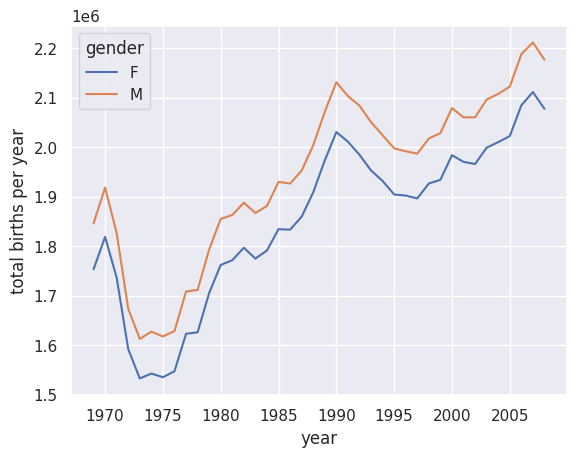

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')


# Vectorized String Operation

INtroducing Pandas String Operations

In [259]:
import numpy as np
x =np.array([2,3,5,7,11,13])
x *2

array([ 4,  6, 10, 14, 22, 26])

In [261]:
data=['peter', 'Paul', 'Mary', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [263]:
data =['peter', 'paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [265]:
import pandas as pd
names =pd.Series(data)
names

0    peter
1     paul
2     None
3     MARY
4    gUIDO
dtype: object

In [266]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## String methods

In [267]:
monte =pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [268]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [269]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [270]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [271]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [272]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [273]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [274]:
# Vectorized item access and slicing

monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [275]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Working with Time Series

`Dates and TImes in Python`

In [278]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [280]:
from dateutil import parser
date =parser.parse("4th of july, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [281]:
date.strftime('%A')

'Saturday'

In [283]:
# Typed arrays of times: Numpy datetime64

import numpy as np
date =np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [284]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [286]:
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

In [287]:
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

In [288]:
np.datetime64('2015-07-04 12:00')

np.datetime64('2015-07-04T12:00')

In [290]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

np.datetime64('2015-07-04T12:59:59.500000000')

In [291]:
# Dates and times in Pandas: Best of both worlds

import pandas as pd
date =pd.to_datetime("4th of july, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [292]:
date.strftime('%A')

'Saturday'

In [293]:
date +pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [294]:
## Onadas Time Series: Indexing by Time

index =pd.DatetimeIndex({'2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'})

In [296]:
date =pd.Series([0,1,2,3], index=index)
date

2014-07-04    0
2015-07-04    1
2014-08-04    2
2015-08-04    3
dtype: int64